✅ Berhasil memuat data dari 'XAUUSD_Daily_201608090000_202506080000.csv'
Hari ini adalah hari ke-173 dalam setahun.
Membuat plot musiman tahunan...


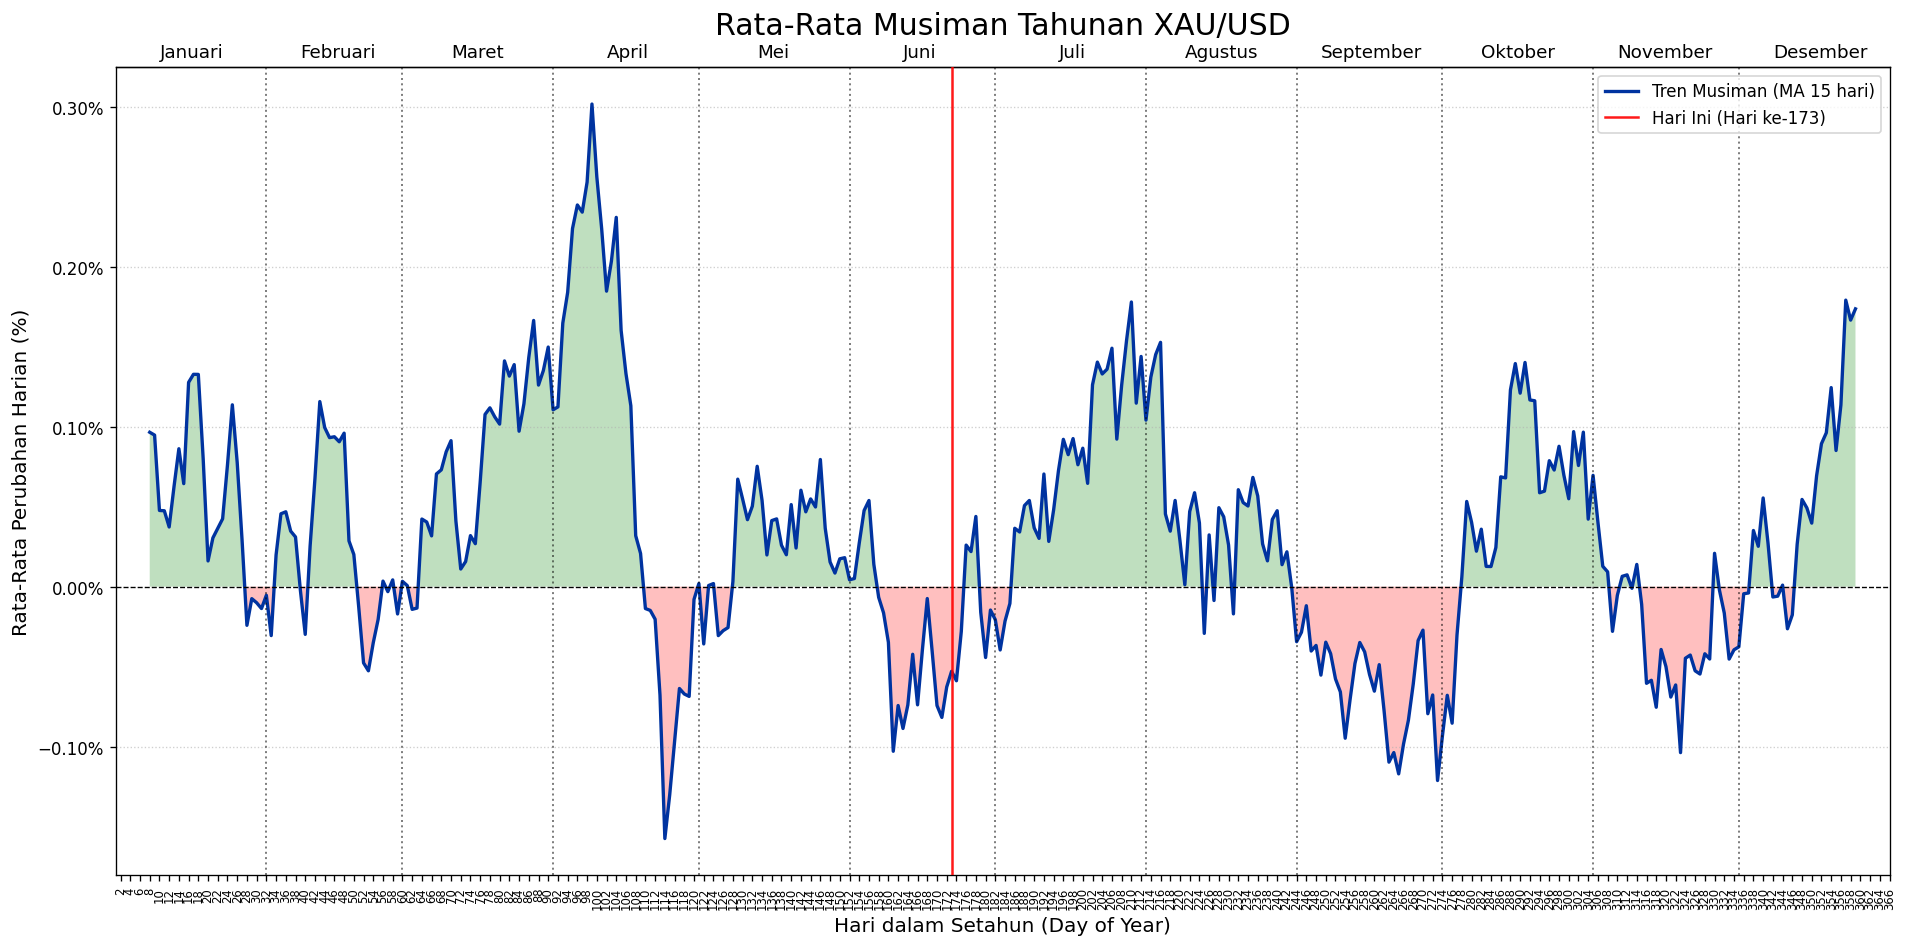

✅ Selesai.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import datetime
from zoneinfo import ZoneInfo

# --- 1. Pengaturan Awal ---
zona_waktu_wib = ZoneInfo("Asia/Jakarta")
input_csv_filename = "XAUUSD_Daily_201608090000_202506080000.csv"
SMOOTHING_WINDOW = 15

# --- 2. Muat dan Persiapkan Data ---
try:
    df = pd.read_csv(input_csv_filename, delim_whitespace=True)
    print(f"✅ Berhasil memuat data dari '{input_csv_filename}'")
except FileNotFoundError:
    print(f"❌ Error: File '{input_csv_filename}' tidak ditemukan.")
    exit()
    
# Dapatkan nomor hari ini dalam setahun (1-366)
day_of_year_today = datetime.datetime.now(zona_waktu_wib).timetuple().tm_yday
print(f"Hari ini adalah hari ke-{day_of_year_today} dalam setahun.")

df.columns = [c.strip('<>') for c in df.columns]
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y.%m.%d')
df.set_index('DATE', inplace=True)
df.dropna(inplace=True)

# --- 3. Kalkulasi Inti Musiman ---
df['daily_return_pct'] = (df['CLOSE'] - df['OPEN']) / df['OPEN'] * 100
df['day_of_year'] = df.index.dayofyear
average_seasonality = df.groupby('day_of_year')['daily_return_pct'].mean()
smoothed_seasonality = average_seasonality.rolling(window=SMOOTHING_WINDOW, center=True).mean()

# --- 4. Buat Visualisasi Plot ---
print("Membuat plot musiman tahunan...")
fig, ax = plt.subplots(figsize=(16, 8), dpi=120)

ax.plot(smoothed_seasonality.index, smoothed_seasonality.values, 
        color='#0033A0', 
        linewidth=2, 
        label=f'Tren Musiman (MA {SMOOTHING_WINDOW} hari)')

ax.fill_between(smoothed_seasonality.index, smoothed_seasonality.values, 0,
                where=smoothed_seasonality.values >= 0, 
                facecolor='green', interpolate=True, alpha=0.25)
ax.fill_between(smoothed_seasonality.index, smoothed_seasonality.values, 0,
                where=smoothed_seasonality.values < 0, 
                facecolor='red', interpolate=True, alpha=0.25)

ax.axhline(0, color='black', linestyle='--', linewidth=0.8)

# --- PERUBAHAN DI SINI ---
# a. Pengaturan Label dan Tampilan
ax.set_title('Rata-Rata Musiman Tahunan XAU/USD', fontsize=18, pad=20)
ax.set_xlabel('Hari dalam Setahun (Day of Year)', fontsize=12) # Label disesuaikan
ax.set_ylabel('Rata-Rata Perubahan Harian (%)', fontsize=12)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=2))

# b. Atur sumbu X untuk menampilkan nomor hari setiap 30 hari
tick_locations = range(0, 367, 2) # Membuat list [0, 30, 60, ..., 360]
ax.set_xticks(ticks=tick_locations)
ax.tick_params(axis='x', rotation=90, labelsize=7)
ax.set_xlim(1, 366)

# --- TAMBAHAN: Garis Pemisah Bulanan ---
# Tentukan hari pertama setiap bulan (mulai dari Februari)
month_start_days = [32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335]

for day in month_start_days:
    # Gambar garis vertikal di setiap awal bulan
    ax.axvline(x=day, color='black', linestyle=':', linewidth=1.2, alpha=0.5)
# -----------------------------------------

# Gambar garis vertikal merah sebagai penanda hari ini
ax.axvline(x=day_of_year_today, 
           color='red', 
           linestyle='-', 
           linewidth=1.5, 
           alpha=0.9, 
           label=f'Hari Ini (Hari ke-{day_of_year_today})',
           zorder=11) # zorder lebih tinggi agar di paling depan
# -------------------------

# --- TAMBAHAN: Sumbu X Sekunder di Bagian Atas ---
# Buat sumbu kedua di lokasi 'top'
ax2 = ax.secondary_xaxis('top')

# Tentukan lokasi penanda di tengah-tengah setiap bulan
month_midpoints = [10, 39, 70, 102, 133, 163, 195, 221, 249, 282, 310, 342]
month_labels = ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember']

# Terapkan lokasi dan label ke sumbu atas
ax2.set_xticks(ticks=month_midpoints)
ax2.set_xticklabels(labels=month_labels, rotation=0, ha='left')
ax2.tick_params(axis='x', labelsize=11)

# Hilangkan garis tick agar terlihat bersih
ax2.tick_params(axis='x', which='both', length=0)
# --- Akhir Blok Tambahan ---

# c. Tambahkan grid dan legenda
ax.grid(axis='y', linestyle=':', alpha=0.6)
ax.legend(loc='upper right')

# d. Rapikan layout dan tampilkan plot
plt.tight_layout()
plt.show()

print("✅ Selesai.")

✅ Berhasil memuat data dari 'BTCUSD_Daily_201803270000_202506080000.csv'
Hari ini adalah hari ke-173 dalam setahun.
Membuat plot musiman tahunan...


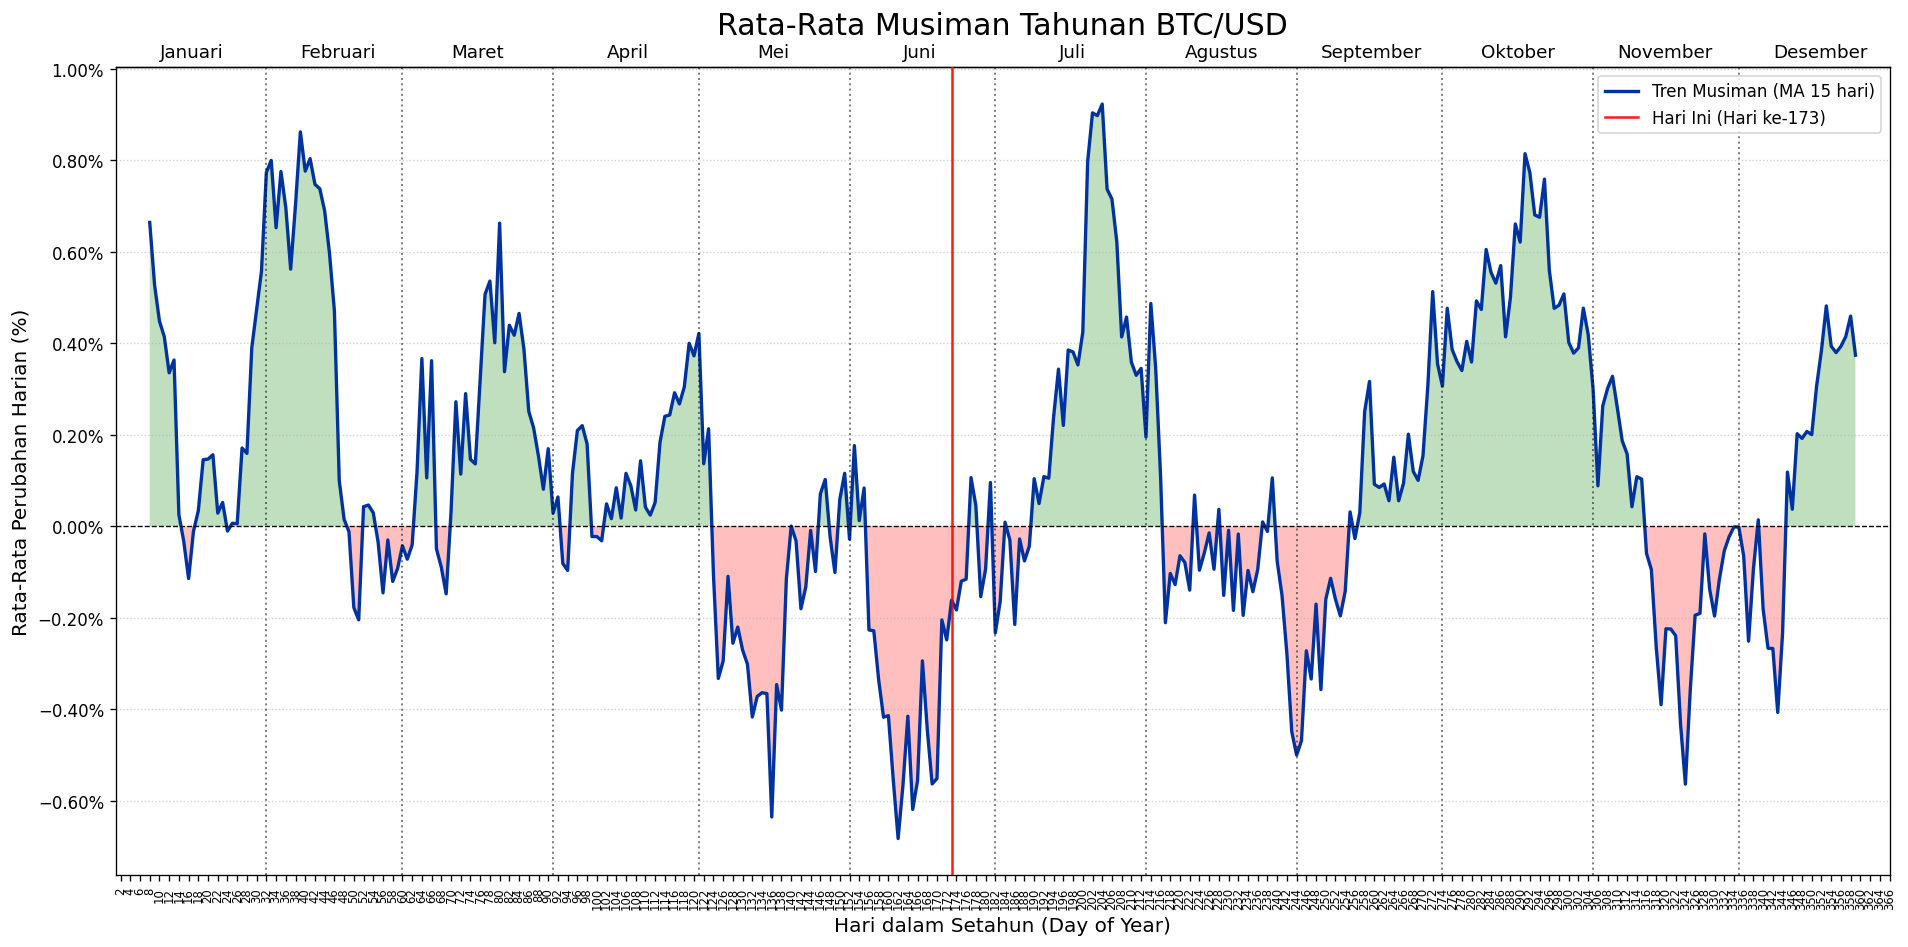

✅ Selesai.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import datetime
from zoneinfo import ZoneInfo

# --- 1. Pengaturan Awal ---
zona_waktu_wib = ZoneInfo("Asia/Jakarta")
input_csv_filename = "BTCUSD_Daily_201803270000_202506080000.csv"
SMOOTHING_WINDOW = 15

# --- 2. Muat dan Persiapkan Data ---
try:
    df = pd.read_csv(input_csv_filename, delim_whitespace=True)
    print(f"✅ Berhasil memuat data dari '{input_csv_filename}'")
except FileNotFoundError:
    print(f"❌ Error: File '{input_csv_filename}' tidak ditemukan.")
    exit()
    
# Dapatkan nomor hari ini dalam setahun (1-366)
day_of_year_today = datetime.datetime.now(zona_waktu_wib).timetuple().tm_yday
print(f"Hari ini adalah hari ke-{day_of_year_today} dalam setahun.")

df.columns = [c.strip('<>') for c in df.columns]
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y.%m.%d')
df.set_index('DATE', inplace=True)
df.dropna(inplace=True)

# --- 3. Kalkulasi Inti Musiman ---
df['daily_return_pct'] = (df['CLOSE'] - df['OPEN']) / df['OPEN'] * 100
df['day_of_year'] = df.index.dayofyear
average_seasonality = df.groupby('day_of_year')['daily_return_pct'].mean()
smoothed_seasonality = average_seasonality.rolling(window=SMOOTHING_WINDOW, center=True).mean()

# --- 4. Buat Visualisasi Plot ---
print("Membuat plot musiman tahunan...")
fig, ax = plt.subplots(figsize=(16, 8), dpi=120)

ax.plot(smoothed_seasonality.index, smoothed_seasonality.values, 
        color='#0033A0', 
        linewidth=2, 
        label=f'Tren Musiman (MA {SMOOTHING_WINDOW} hari)')

ax.fill_between(smoothed_seasonality.index, smoothed_seasonality.values, 0,
                where=smoothed_seasonality.values >= 0, 
                facecolor='green', interpolate=True, alpha=0.25)
ax.fill_between(smoothed_seasonality.index, smoothed_seasonality.values, 0,
                where=smoothed_seasonality.values < 0, 
                facecolor='red', interpolate=True, alpha=0.25)

ax.axhline(0, color='black', linestyle='--', linewidth=0.8)

# --- PERUBAHAN DI SINI ---
# a. Pengaturan Label dan Tampilan
ax.set_title('Rata-Rata Musiman Tahunan BTC/USD', fontsize=18, pad=20)
ax.set_xlabel('Hari dalam Setahun (Day of Year)', fontsize=12) # Label disesuaikan
ax.set_ylabel('Rata-Rata Perubahan Harian (%)', fontsize=12)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=2))

# b. Atur sumbu X untuk menampilkan nomor hari setiap 30 hari
tick_locations = range(0, 367, 2) # Membuat list [0, 30, 60, ..., 360]
ax.set_xticks(ticks=tick_locations)
ax.tick_params(axis='x', rotation=90, labelsize=7)
ax.set_xlim(1, 366)

# --- TAMBAHAN: Garis Pemisah Bulanan ---
# Tentukan hari pertama setiap bulan (mulai dari Februari)
month_start_days = [32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335]

for day in month_start_days:
    # Gambar garis vertikal di setiap awal bulan
    ax.axvline(x=day, color='black', linestyle=':', linewidth=1.2, alpha=0.5)
# -----------------------------------------

# Gambar garis vertikal merah sebagai penanda hari ini
ax.axvline(x=day_of_year_today, 
           color='red', 
           linestyle='-', 
           linewidth=1.5, 
           alpha=0.9, 
           label=f'Hari Ini (Hari ke-{day_of_year_today})',
           zorder=11) # zorder lebih tinggi agar di paling depan
# -------------------------

# --- TAMBAHAN: Sumbu X Sekunder di Bagian Atas ---
# Buat sumbu kedua di lokasi 'top'
ax2 = ax.secondary_xaxis('top')

# Tentukan lokasi penanda di tengah-tengah setiap bulan
month_midpoints = [10, 39, 70, 102, 133, 163, 195, 221, 249, 282, 310, 342]
month_labels = ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember']

# Terapkan lokasi dan label ke sumbu atas
ax2.set_xticks(ticks=month_midpoints)
ax2.set_xticklabels(labels=month_labels, rotation=0, ha='left')
ax2.tick_params(axis='x', labelsize=11)

# Hilangkan garis tick agar terlihat bersih
ax2.tick_params(axis='x', which='both', length=0)
# --- Akhir Blok Tambahan ---

# c. Tambahkan grid dan legenda
ax.grid(axis='y', linestyle=':', alpha=0.6)
ax.legend(loc='upper right')

# d. Rapikan layout dan tampilkan plot
plt.tight_layout()
plt.show()

print("✅ Selesai.")

✅ Berhasil memuat data dari 'GBPJPY_Daily_201608110000_202506110000.csv'
Hari ini adalah hari ke-173 dalam setahun.
Membuat plot musiman tahunan...


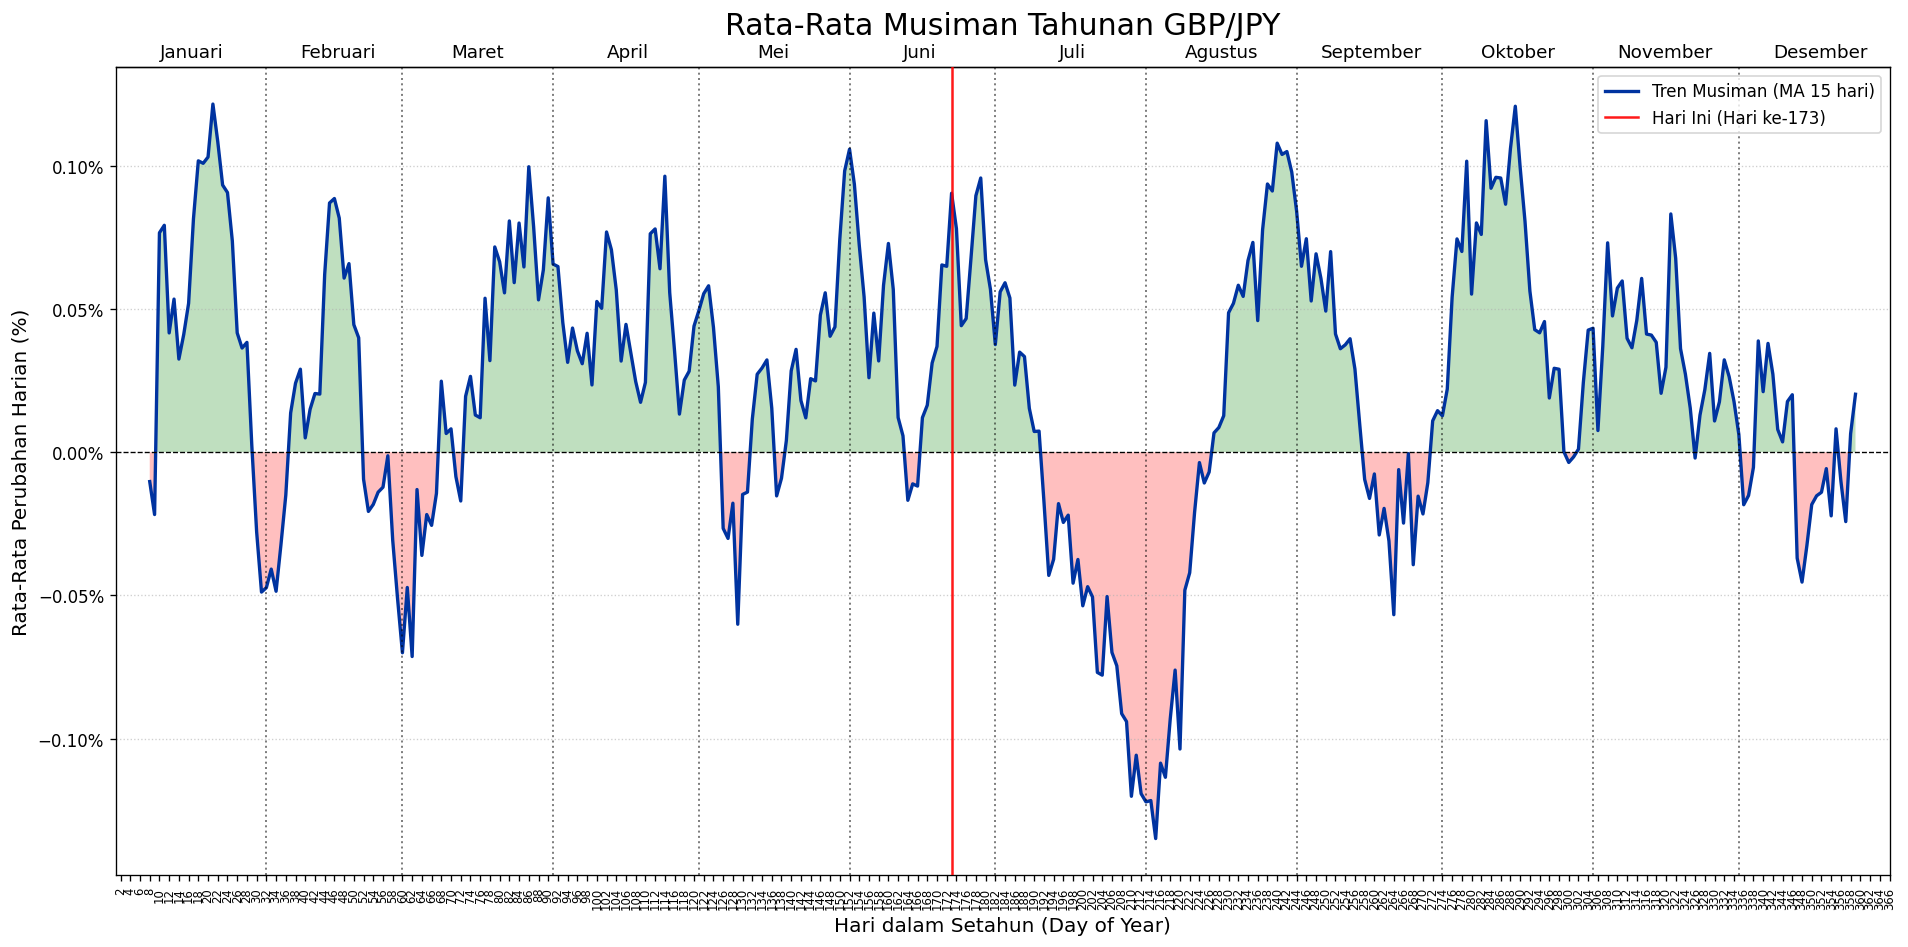

✅ Selesai.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import datetime
from zoneinfo import ZoneInfo

# --- 1. Pengaturan Awal ---
zona_waktu_wib = ZoneInfo("Asia/Jakarta")
input_csv_filename = "GBPJPY_Daily_201608110000_202506110000.csv"
SMOOTHING_WINDOW = 15

# --- 2. Muat dan Persiapkan Data ---
try:
    df = pd.read_csv(input_csv_filename, delim_whitespace=True)
    print(f"✅ Berhasil memuat data dari '{input_csv_filename}'")
except FileNotFoundError:
    print(f"❌ Error: File '{input_csv_filename}' tidak ditemukan.")
    exit()
    
# Dapatkan nomor hari ini dalam setahun (1-366)
day_of_year_today = datetime.datetime.now(zona_waktu_wib).timetuple().tm_yday
print(f"Hari ini adalah hari ke-{day_of_year_today} dalam setahun.")

df.columns = [c.strip('<>') for c in df.columns]
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y.%m.%d')
df.set_index('DATE', inplace=True)
df.dropna(inplace=True)

# --- 3. Kalkulasi Inti Musiman ---
df['daily_return_pct'] = (df['CLOSE'] - df['OPEN']) / df['OPEN'] * 100
df['day_of_year'] = df.index.dayofyear
average_seasonality = df.groupby('day_of_year')['daily_return_pct'].mean()
smoothed_seasonality = average_seasonality.rolling(window=SMOOTHING_WINDOW, center=True).mean()

# --- 4. Buat Visualisasi Plot ---
print("Membuat plot musiman tahunan...")
fig, ax = plt.subplots(figsize=(16, 8), dpi=120)

ax.plot(smoothed_seasonality.index, smoothed_seasonality.values, 
        color='#0033A0', 
        linewidth=2, 
        label=f'Tren Musiman (MA {SMOOTHING_WINDOW} hari)')

ax.fill_between(smoothed_seasonality.index, smoothed_seasonality.values, 0,
                where=smoothed_seasonality.values >= 0, 
                facecolor='green', interpolate=True, alpha=0.25)
ax.fill_between(smoothed_seasonality.index, smoothed_seasonality.values, 0,
                where=smoothed_seasonality.values < 0, 
                facecolor='red', interpolate=True, alpha=0.25)

ax.axhline(0, color='black', linestyle='--', linewidth=0.8)

# --- PERUBAHAN DI SINI ---
# a. Pengaturan Label dan Tampilan
ax.set_title('Rata-Rata Musiman Tahunan GBP/JPY', fontsize=18, pad=20)
ax.set_xlabel('Hari dalam Setahun (Day of Year)', fontsize=12) # Label disesuaikan
ax.set_ylabel('Rata-Rata Perubahan Harian (%)', fontsize=12)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=2))

# b. Atur sumbu X untuk menampilkan nomor hari setiap 30 hari
tick_locations = range(0, 367, 2) # Membuat list [0, 30, 60, ..., 360]
ax.set_xticks(ticks=tick_locations)
ax.tick_params(axis='x', rotation=90, labelsize=7)
ax.set_xlim(1, 366)

# --- TAMBAHAN: Garis Pemisah Bulanan ---
# Tentukan hari pertama setiap bulan (mulai dari Februari)
month_start_days = [32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335]

for day in month_start_days:
    # Gambar garis vertikal di setiap awal bulan
    ax.axvline(x=day, color='black', linestyle=':', linewidth=1.2, alpha=0.5)
# -----------------------------------------

# Gambar garis vertikal merah sebagai penanda hari ini
ax.axvline(x=day_of_year_today, 
           color='red', 
           linestyle='-', 
           linewidth=1.5, 
           alpha=0.9, 
           label=f'Hari Ini (Hari ke-{day_of_year_today})',
           zorder=11) # zorder lebih tinggi agar di paling depan
# -------------------------

# --- TAMBAHAN: Sumbu X Sekunder di Bagian Atas ---
# Buat sumbu kedua di lokasi 'top'
ax2 = ax.secondary_xaxis('top')

# Tentukan lokasi penanda di tengah-tengah setiap bulan
month_midpoints = [10, 39, 70, 102, 133, 163, 195, 221, 249, 282, 310, 342]
month_labels = ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember']

# Terapkan lokasi dan label ke sumbu atas
ax2.set_xticks(ticks=month_midpoints)
ax2.set_xticklabels(labels=month_labels, rotation=0, ha='left')
ax2.tick_params(axis='x', labelsize=11)

# Hilangkan garis tick agar terlihat bersih
ax2.tick_params(axis='x', which='both', length=0)
# --- Akhir Blok Tambahan ---

# c. Tambahkan grid dan legenda
ax.grid(axis='y', linestyle=':', alpha=0.6)
ax.legend(loc='upper right')

# d. Rapikan layout dan tampilkan plot
plt.tight_layout()
plt.show()

print("✅ Selesai.")

✅ Berhasil memuat data dari 'USOIL_Daily_201910290000_202506110000.csv'
Hari ini adalah hari ke-173 dalam setahun.
Membuat plot musiman tahunan...


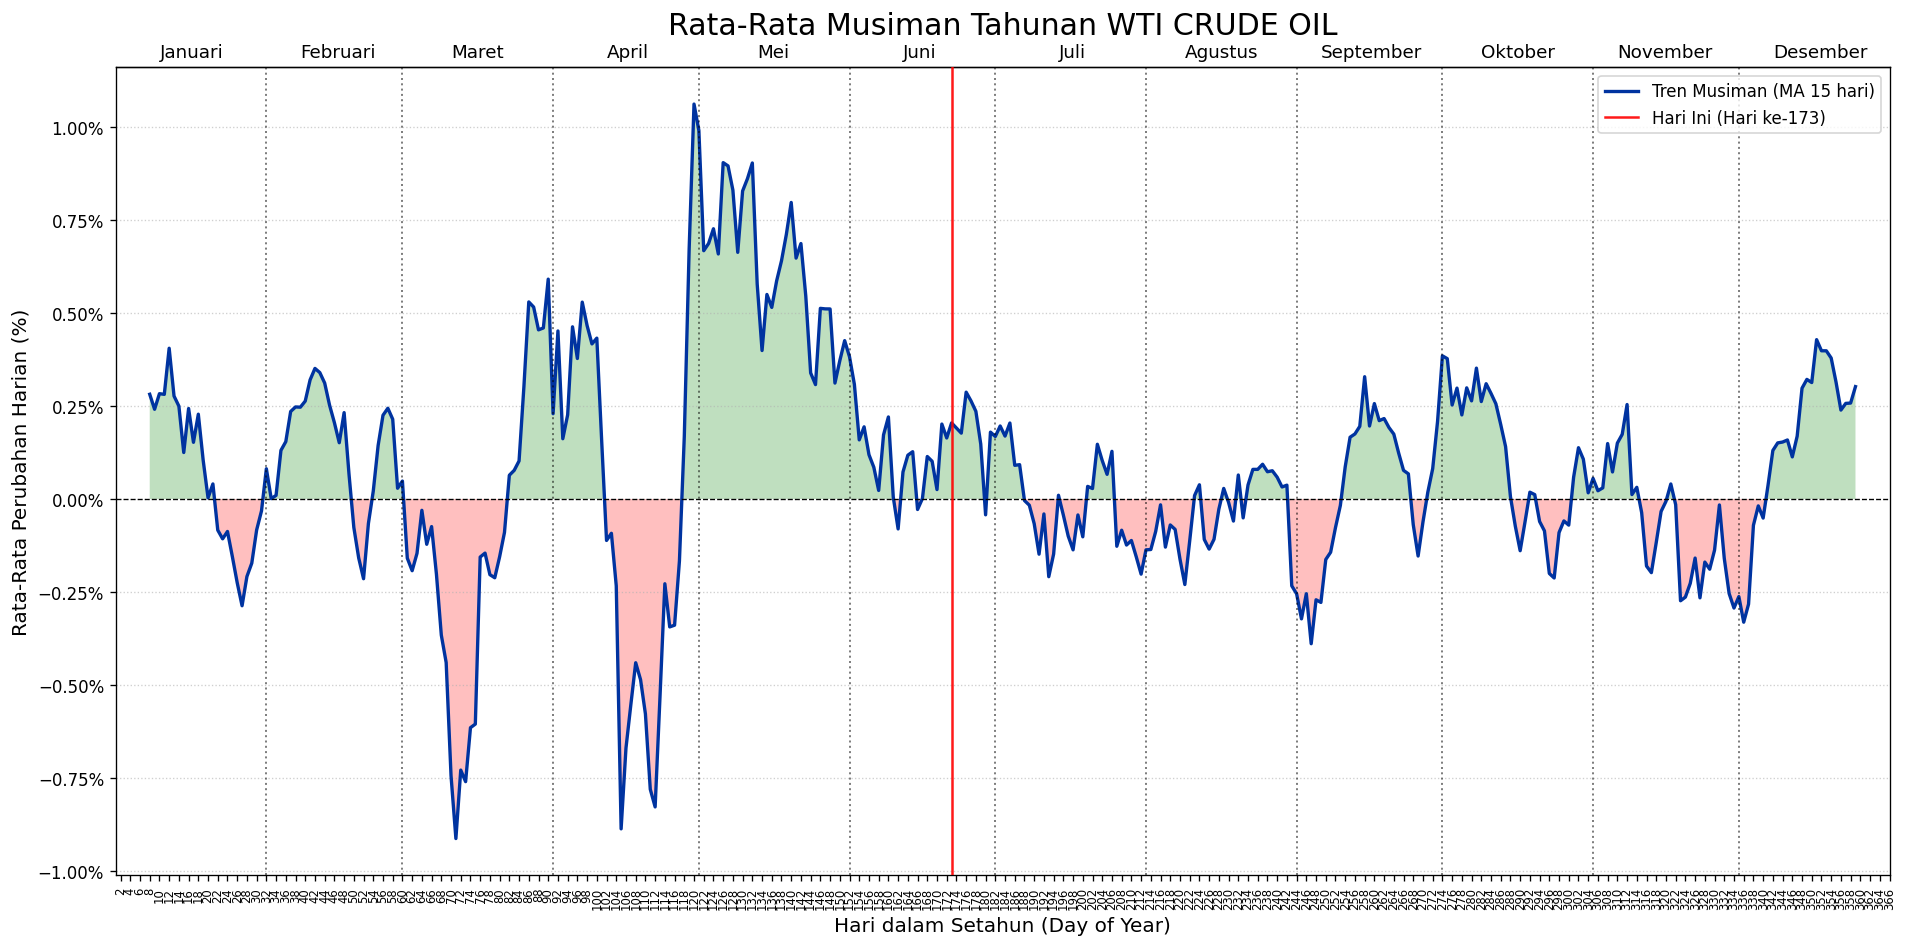

✅ Selesai.


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from zoneinfo import ZoneInfo

# --- 1. Pengaturan Awal ---
zona_waktu_wib = ZoneInfo("Asia/Jakarta")
input_csv_filename = "USOIL_Daily_201910290000_202506110000.csv"
SMOOTHING_WINDOW = 15

# --- 2. Muat dan Persiapkan Data ---
try:
    df = pd.read_csv(input_csv_filename, delim_whitespace=True)
    print(f"✅ Berhasil memuat data dari '{input_csv_filename}'")
except FileNotFoundError:
    print(f"❌ Error: File '{input_csv_filename}' tidak ditemukan.")
    exit()
    
# Dapatkan nomor hari ini dalam setahun (1-366)
day_of_year_today = datetime.datetime.now(zona_waktu_wib).timetuple().tm_yday
print(f"Hari ini adalah hari ke-{day_of_year_today} dalam setahun.")

df.columns = [c.strip('<>') for c in df.columns]
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y.%m.%d')
df.set_index('DATE', inplace=True)
df.dropna(inplace=True)

# --- 3. Kalkulasi Inti Musiman ---
df['daily_return_pct'] = (df['CLOSE'] - df['OPEN']) / df['OPEN'] * 100
df['day_of_year'] = df.index.dayofyear
average_seasonality = df.groupby('day_of_year')['daily_return_pct'].mean()
smoothed_seasonality = average_seasonality.rolling(window=SMOOTHING_WINDOW, center=True).mean()

# --- 4. Buat Visualisasi Plot ---
print("Membuat plot musiman tahunan...")
fig, ax = plt.subplots(figsize=(16, 8), dpi=120)

ax.plot(smoothed_seasonality.index, smoothed_seasonality.values, 
        color='#0033A0', 
        linewidth=2, 
        label=f'Tren Musiman (MA {SMOOTHING_WINDOW} hari)')

ax.fill_between(smoothed_seasonality.index, smoothed_seasonality.values, 0,
                where=smoothed_seasonality.values >= 0, 
                facecolor='green', interpolate=True, alpha=0.25)
ax.fill_between(smoothed_seasonality.index, smoothed_seasonality.values, 0,
                where=smoothed_seasonality.values < 0, 
                facecolor='red', interpolate=True, alpha=0.25)

ax.axhline(0, color='black', linestyle='--', linewidth=0.8)

# --- PERUBAHAN DI SINI ---
# a. Pengaturan Label dan Tampilan
ax.set_title('Rata-Rata Musiman Tahunan WTI CRUDE OIL', fontsize=18, pad=20)
ax.set_xlabel('Hari dalam Setahun (Day of Year)', fontsize=12) # Label disesuaikan
ax.set_ylabel('Rata-Rata Perubahan Harian (%)', fontsize=12)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=2))

# b. Atur sumbu X untuk menampilkan nomor hari setiap 30 hari
tick_locations = range(0, 367, 2) # Membuat list [0, 30, 60, ..., 360]
ax.set_xticks(ticks=tick_locations)
ax.tick_params(axis='x', rotation=90, labelsize=7)
ax.set_xlim(1, 366)

# --- TAMBAHAN: Garis Pemisah Bulanan ---
# Tentukan hari pertama setiap bulan (mulai dari Februari)
month_start_days = [32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335]

for day in month_start_days:
    # Gambar garis vertikal di setiap awal bulan
    ax.axvline(x=day, color='black', linestyle=':', linewidth=1.2, alpha=0.5)
# -----------------------------------------

# Gambar garis vertikal merah sebagai penanda hari ini
ax.axvline(x=day_of_year_today, 
           color='red', 
           linestyle='-', 
           linewidth=1.5, 
           alpha=0.9, 
           label=f'Hari Ini (Hari ke-{day_of_year_today})',
           zorder=11) # zorder lebih tinggi agar di paling depan
# -------------------------

# --- TAMBAHAN: Sumbu X Sekunder di Bagian Atas ---
# Buat sumbu kedua di lokasi 'top'
ax2 = ax.secondary_xaxis('top')

# Tentukan lokasi penanda di tengah-tengah setiap bulan
month_midpoints = [10, 39, 70, 102, 133, 163, 195, 221, 249, 282, 310, 342]
month_labels = ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember']

# Terapkan lokasi dan label ke sumbu atas
ax2.set_xticks(ticks=month_midpoints)
ax2.set_xticklabels(labels=month_labels, rotation=0, ha='left')
ax2.tick_params(axis='x', labelsize=11)

# Hilangkan garis tick agar terlihat bersih
ax2.tick_params(axis='x', which='both', length=0)
# --- Akhir Blok Tambahan ---

# c. Tambahkan grid dan legenda
ax.grid(axis='y', linestyle=':', alpha=0.6)
ax.legend(loc='upper right')

# d. Rapikan layout dan tampilkan plot
plt.tight_layout()
plt.show()

print("✅ Selesai.")

✅ Berhasil memuat data dari 'USTEC_Daily_201910290000_202506110000.csv'
Hari ini adalah hari ke-173 dalam setahun.
Membuat plot musiman tahunan...


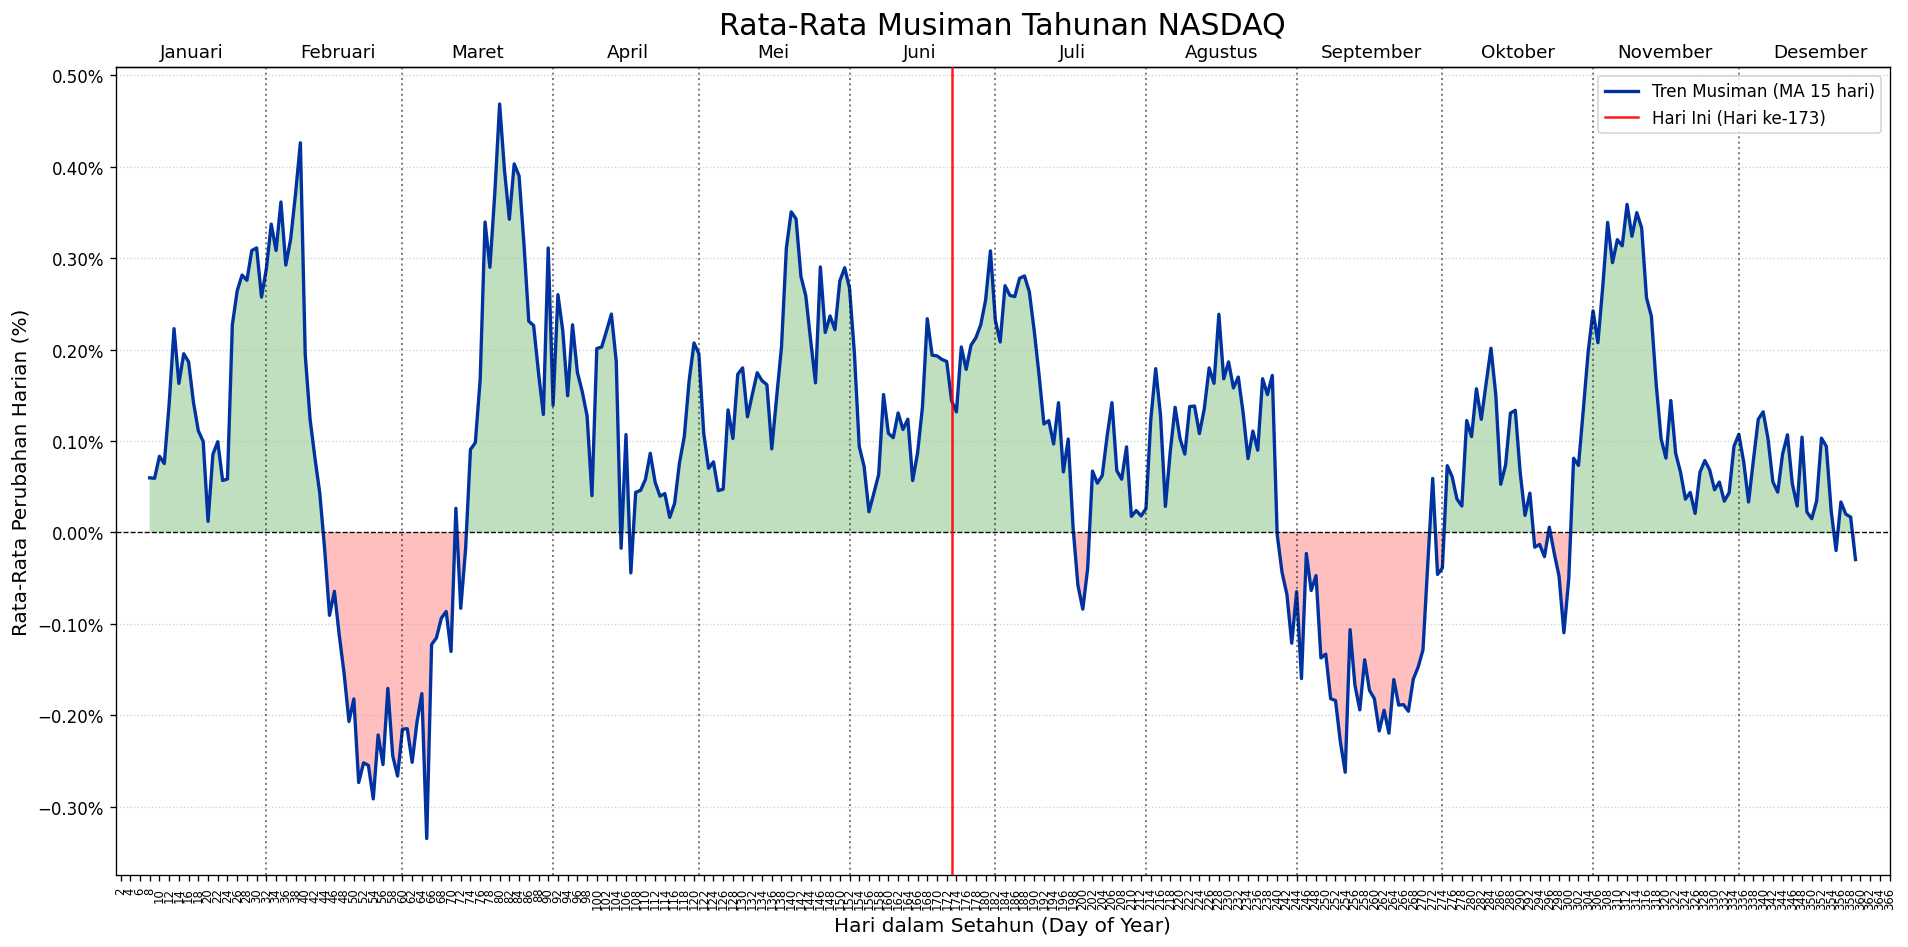

✅ Selesai.


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import datetime
from zoneinfo import ZoneInfo

# --- 1. Pengaturan Awal ---
zona_waktu_wib = ZoneInfo("Asia/Jakarta")
input_csv_filename = "USTEC_Daily_201910290000_202506110000.csv"
SMOOTHING_WINDOW = 15

# --- 2. Muat dan Persiapkan Data ---
try:
    df = pd.read_csv(input_csv_filename, delim_whitespace=True)
    print(f"✅ Berhasil memuat data dari '{input_csv_filename}'")
except FileNotFoundError:
    print(f"❌ Error: File '{input_csv_filename}' tidak ditemukan.")
    exit()
    
# Dapatkan nomor hari ini dalam setahun (1-366)
day_of_year_today = datetime.datetime.now(zona_waktu_wib).timetuple().tm_yday
print(f"Hari ini adalah hari ke-{day_of_year_today} dalam setahun.")

df.columns = [c.strip('<>') for c in df.columns]
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y.%m.%d')
df.set_index('DATE', inplace=True)
df.dropna(inplace=True)

# --- 3. Kalkulasi Inti Musiman ---
df['daily_return_pct'] = (df['CLOSE'] - df['OPEN']) / df['OPEN'] * 100
df['day_of_year'] = df.index.dayofyear
average_seasonality = df.groupby('day_of_year')['daily_return_pct'].mean()
smoothed_seasonality = average_seasonality.rolling(window=SMOOTHING_WINDOW, center=True).mean()

# --- 4. Buat Visualisasi Plot ---
print("Membuat plot musiman tahunan...")
fig, ax = plt.subplots(figsize=(16, 8), dpi=120)

ax.plot(smoothed_seasonality.index, smoothed_seasonality.values, 
        color='#0033A0', 
        linewidth=2, 
        label=f'Tren Musiman (MA {SMOOTHING_WINDOW} hari)')

ax.fill_between(smoothed_seasonality.index, smoothed_seasonality.values, 0,
                where=smoothed_seasonality.values >= 0, 
                facecolor='green', interpolate=True, alpha=0.25)
ax.fill_between(smoothed_seasonality.index, smoothed_seasonality.values, 0,
                where=smoothed_seasonality.values < 0, 
                facecolor='red', interpolate=True, alpha=0.25)

ax.axhline(0, color='black', linestyle='--', linewidth=0.8)

# --- PERUBAHAN DI SINI ---
# a. Pengaturan Label dan Tampilan
ax.set_title('Rata-Rata Musiman Tahunan NASDAQ', fontsize=18, pad=20)
ax.set_xlabel('Hari dalam Setahun (Day of Year)', fontsize=12) # Label disesuaikan
ax.set_ylabel('Rata-Rata Perubahan Harian (%)', fontsize=12)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=2))

# b. Atur sumbu X untuk menampilkan nomor hari setiap 30 hari
tick_locations = range(0, 367, 2) # Membuat list [0, 30, 60, ..., 360]
ax.set_xticks(ticks=tick_locations)
ax.tick_params(axis='x', rotation=90, labelsize=7)
ax.set_xlim(1, 366)

# --- TAMBAHAN: Garis Pemisah Bulanan ---
# Tentukan hari pertama setiap bulan (mulai dari Februari)
month_start_days = [32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335]

for day in month_start_days:
    # Gambar garis vertikal di setiap awal bulan
    ax.axvline(x=day, color='black', linestyle=':', linewidth=1.2, alpha=0.5)
# -----------------------------------------

# Gambar garis vertikal merah sebagai penanda hari ini
ax.axvline(x=day_of_year_today, 
           color='red', 
           linestyle='-', 
           linewidth=1.5, 
           alpha=0.9, 
           label=f'Hari Ini (Hari ke-{day_of_year_today})',
           zorder=11) # zorder lebih tinggi agar di paling depan
# -------------------------

# --- TAMBAHAN: Sumbu X Sekunder di Bagian Atas ---
# Buat sumbu kedua di lokasi 'top'
ax2 = ax.secondary_xaxis('top')

# Tentukan lokasi penanda di tengah-tengah setiap bulan
month_midpoints = [10, 39, 70, 102, 133, 163, 195, 221, 249, 282, 310, 342]
month_labels = ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember']

# Terapkan lokasi dan label ke sumbu atas
ax2.set_xticks(ticks=month_midpoints)
ax2.set_xticklabels(labels=month_labels, rotation=0, ha='left')
ax2.tick_params(axis='x', labelsize=11)

# Hilangkan garis tick agar terlihat bersih
ax2.tick_params(axis='x', which='both', length=0)
# --- Akhir Blok Tambahan ---

# c. Tambahkan grid dan legenda
ax.grid(axis='y', linestyle=':', alpha=0.6)
ax.legend(loc='upper right')

# d. Rapikan layout dan tampilkan plot
plt.tight_layout()
plt.show()

print("✅ Selesai.")